# Will I hang out with you?

A mock machine learning model to save your time trying to find out whether we are going to be best buds (PS: it's more likely than expected! :)

In [1]:
from sklearn import preprocessing
from sklearn import pipeline
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


plt.rcParams.update({'font.size': 12})

## Input data

The model is trained upon two files. The first one, `names_encoded.csv`, is a brief list of people I know with some personality traits I deem relevant. The second, `comb_encoded.csv`, is a table containing whether the person in the first column beats the person in the second column when it comes to "who I would rather hang out with?" 

In [2]:
subjects = pd.read_csv('names_encoded.csv', index_col=0)
comb = pd.read_csv('comb_encoded.csv')

X = []
y = []

for n in range(len(comb)):
    personA = comb.iloc[n]['personA']
    personB = comb.iloc[n]['personB']
    answer = comb.iloc[n]['personAwins']
    result = list(subjects.loc[personA] - subjects.loc[personB])    
    y.append(int(answer))
    X.append(result)

Before we get to the machine learning model itself, some really interesting patterns emerged from the table. First and foremost, I was impressed by how few of the traits I picked were correlated. Secondly, the few correlated traits were what I kind of expected; for instance, political alignment correlated with openness, but negatively correlated with intelligence. That doesn't mean it is true, however. The data is probably biased from my own personal judgment.

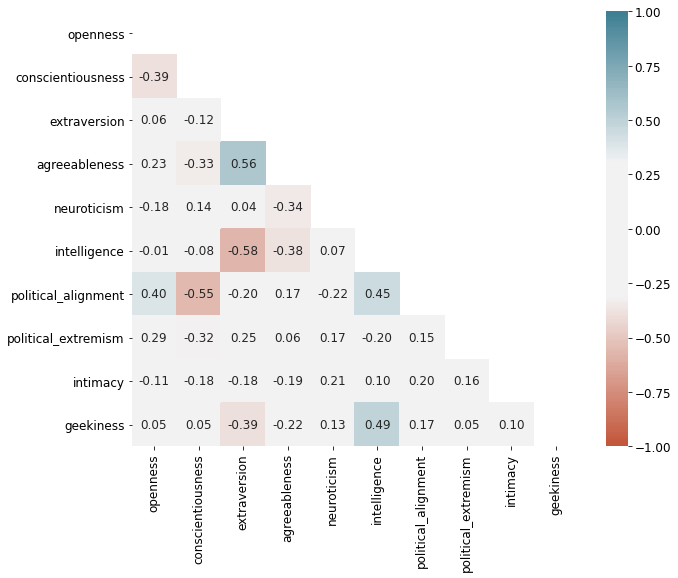

In [3]:
mask = np.triu(np.ones_like(subjects.corr()))
plt.figure(figsize=(10,8))
sns.heatmap(subjects.corr(),
            annot=True,
            fmt=".2f",
            vmin=-1,
            vmax=1,
            mask=mask,
            cmap=sns.diverging_palette(20, 220, n=200, sep=80)
           )
plt.show()

In [4]:
model = pipeline.make_pipeline(preprocessing.StandardScaler(),
                               linear_model.LogisticRegression())

model.fit(X,y)
importances = model.named_steps['logisticregression'].coef_[0]

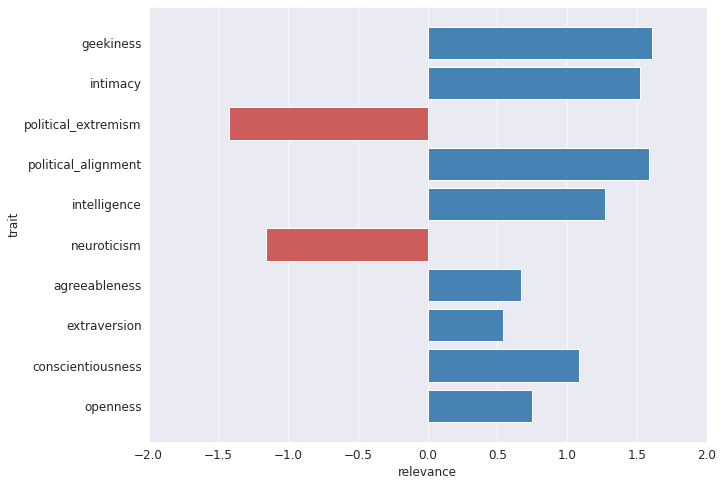

In [5]:
sns.set_style("darkgrid")
colors = ["indianred" if x < 0 else "steelblue" for x in importances]
pos = np.arange(len(subjects.columns)) + 0.5

plt.figure(figsize=(10,8))
plt.barh(pos, importances, align='center', color=colors)
plt.xlim(-2,2)
plt.yticks(pos, subjects.columns)
plt.ylabel("trait")
plt.xlabel("relevance")
plt.grid(axis="y")
plt.show()

In [6]:
scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print(scores.mean(), scores.std())

0.8731863442389758 0.06613059845177201


The model's accuracy was remarkably good for something so dead simple. Interestingly, the graph shows that if 

- you're a geek,
- we agree on politics,
- and we know each other for a long while,

We'll probably hang out a lot. Be careful however, because political extremism and neuroticism are a big no-go.